# Lab 3 Assignment 1

## Introduction

In today's day and age, we are exposed to a diverse and global culture. Among them, there is this niche category of Japanese cultured people called `Otaku`s. They are basically people that hide in their rooms all day just to finish their favorite movie episodes in which they call it **anime**, a slang/abbriviation from the term <u>animation</u> and adapted to japanese. 

This culture, in fact, has grown to be quite solid and stable. Hence is actually a pretty niche and exciting market to tackle it.

If we were to target this group of people, what should we look out for? What kinds of movies do `Otaku`s prefer? As a business, how do we effectively earn money from these group of potentially international market?

Today, an attempt of prediction(s) shall be made based on an open anime review/ratings dataset from kaggle.com. The main need for this Lab Assignment is to use Regression and Classification to solve one problem. Below I will explain my rationale for the methods I have chosen.

## Step 1: Data Gathering

Usually this is the hardest step. I chose this dataset because I am interested to see if there is any correlation between nember of episodes, types of show, genre etc with the popularity/rating of a general anime.

This is the dataset that I will be using throughout the assignment: <a href='https://www.kaggle.com/CooperUnion/anime-recommendations-database/downloads/anime-recommendations-database.zip/1'> anime dataset </a>, Thanks for making the data publically available for everyone.

In [1]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# load the dataset "anime.csv"
dataset = pd.read_csv("~/codes/NN_Python/Dataset/anime.csv")

Now let us take a look at the datset:

In [2]:
# Dataset first 5
print(dataset.head(5))

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [3]:
# observing the dataset column names
print(dataset.columns)

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')


# Part One: Regression

## Step 2: Data Preprocessing

Yay, we have our dataset! Jolly well we are gonna just throw everything and yolo it hahahaha. **NO!** Remeber to always preprocess your data before doing anything to it!!! This is an integral step in any Machine Learning process. Here, we take a closer look at the dataset.

In [4]:
# checking for null datapoints
pd.isnull(dataset).sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Here, we can observe that some datapoints do not exist! Throwing this datset directly into any model will not produce legitamate results!!! 
The quickest and dirtiest method is to remove the rows containing the null datapoints. So let's remove the null datapoints and see what happens:

In [5]:
# Removing null datapoints
modified_dataset = dataset.dropna()

Upon further inspectin, I have found out something weird about the episode column. Some anime such as `One Piece`, `Detective Conan`, `Dragon Ball Super`, etc have episode count as `Unknown`. This is because at the time the dataset was scrutinized, the anime has not finish airing, some of them even until now, are still good shows in the making.

Hence, I have decided to exclude them from the dataset and only do analysis and prediction based on "historical data". 

In [6]:
modified_dataset = modified_dataset[~modified_dataset.episodes.str.contains('Unknown')]

Next, I have decided to use categorical data to do linear regression. Is it advisable? I'm not sure. However, after some thoughts, I can use the independent variables as stepwise functions to take values of only one or 0. This means that I cannot make very accurate models since my datapoints only take `1` or `0` values, solely relying on the weights to alter the ratings. 

Regardless, here are the steps I have taken to change all the categorical data into something called `dummy variables`

In [7]:
# Splitting the 'genre' column and type column
genres = modified_dataset['genre'].str.get_dummies(', ').astype(int)
types = modified_dataset['type'].str.get_dummies(', ').astype(int)

Upon inspection, the `genre` had a `Music` type, and `types` had a `Music` type as well. From the prespective of capturing as much variables as possible, I would like to maintain both variables and hence decide to rename the columns of `types`:

In [8]:
# Upon inspection the type had music as type, and music as genre. Rename column
types.columns = ['Movie', 'Music1', 'ONA', 'OVA', 'Special', 'TV']

Finally let us create the final input variables as `inp` and output variables as `label`, and also create `train-test` set of ratio `9:1`:

In [9]:
# Combining to form inp variables
inp = genres.join(types)
# creating train test split
inp_train, inp_test, label_train, label_test = train_test_split(inp, 
            modified_dataset[['rating']], test_size = 0.1, random_state = 1509)

For now, we are done.  This is one of the most tedious parts. Hopefully this step is sufficient in making good predictions

## Step 3: Choosing a model

So far it has been a pretty simple journey, we picked our dataset, cleaned it and hope its good. The only way to validate is to choose a proper model and evaluate it. In Lab 3, we are exposed to `linear regression`, we will be using a variant called the `multivariable linear regression`, and for classification (pending...)

In any `linear regression` algorithm, the most important metric is the `MSE` and the `R-squared` values, on both the `train` and `test` dataset.(`test` in this case can be either `test` or `validation` since they serve the same purpose for now)

In the next step, we try a few combos and see if we can find any correlation between variables.

## Step 4: Training

Finally, we can start to train! This is one of the shortest step since:

In [10]:
# Question 1: is the rating of the movie based on genre and type?
linear_model = LinearRegression().fit(inp_train,label_train)
print(linear_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


## Step 5: Evaluating

Wow that was quick eh, training is done. So, here we attempt to see if the model is trained properly or if our hypothesis even stands.

According to our explanation earlier, we will mainly use the `R-squared` values to see if the line fits the model. Statistically speaking, if it is closer to `0`, there is no correlation to the output variables, if it is closer to `1`, it will have stronger correlation to the output variable.

First, let's test it with itself.

In [11]:
# checking R^2 values of train dataset
linear_model.score(inp_train, label_train)

0.3253542294194377

The `R-squared` values is **0.3253542294194377**.

Next, let's test it against the `test` dataset

In [12]:
# checking R^2 values of test dataset
linear_model.score(inp_test, label_test)

0.3106783693263454

The `R-squared` values is **0.3106783693263454**.

After poking around online, I have found out how to remove the irrelevant variables with a different library, 

In [13]:
# all the models above do not give good result? why? This is my evaluation method
X = sm.add_constant(inp_train.astype(float))
Y = label_train.astype(int)
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     92.38
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        23:55:12   Log-Likelihood:                -13835.
No. Observations:               10647   AIC:                         2.777e+04
Df Residuals:                   10598   BIC:                         2.812e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.5655      0.021    219.268

/home/spdpnd98/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


The p-values actually test against the null hypothesis. So the "outliers" are actually allowing us to reject the null hypothesis such that the variables have linear relationship with the ratings

In [14]:
# dropping columns that are irrelevant(?), high p values
inp_train_modified = inp_train.drop(columns=['Cars','Demons', 'Ecchi', 'Harem', 'Magic', 'Martial Arts', 'Mecha', 'Music', 'Samurai', 'Shoujo Ai', 'Space', 'Vampire', 'Yaoi', 'Yuri', 'Shounen Ai'])
inp_test_modified = inp_test.drop(columns=['Cars','Demons', 'Ecchi', 'Harem', 'Magic', 'Martial Arts', 'Mecha', 'Music', 'Samurai', 'Shoujo Ai', 'Space', 'Vampire', 'Yaoi', 'Yuri', 'Shounen Ai'])

In [15]:
# Refit model: see how it fares
X = sm.add_constant(inp_train_modified.astype(float))
Y = label_train.astype(int)
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     133.7
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        23:55:12   Log-Likelihood:                -13845.
No. Observations:               10647   AIC:                         2.776e+04
Df Residuals:                   10613   BIC:                         2.801e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.5813      0.018    260.892

However, for the sake of how big this project will turn, I shall not go in-depth into removing the variables, then evaluating, then testing, etc... The process however, if followed will eventually lead to the best outcome the model can reach.

## Step 6 Hyperparameter Tuning

For this specific model, I plan to skip this step. This step remains here for the sake of completeness in the future.

## Step 7: Testing

Looking at the predictions ourselves:

In [16]:
# predict train dataset...
print(linear_model.predict(inp_train))
print(label_train.head(3))
print(label_train.tail(3))

[[6.93286133]
 [6.88256836]
 [5.51391602]
 ...
 [6.83886719]
 [6.86279297]
 [6.546875  ]]
       rating
10722    5.45
522      8.01
6527     6.07
       rating
6621     6.03
1059     7.70
10234    6.25


It seems the model has fit the ratings quite well. Even tho the metrics do not show strong correlation, the model seems to have captured some important metrics in the training dataset!

In [17]:
# predict test dataset...
print(linear_model.predict(inp_test))
print(label_test.head(3))
print(label_test.tail(3))

[[6.12744141]
 [5.51391602]
 [6.92016602]
 ...
 [6.47265625]
 [7.13427734]
 [5.10229492]]
      rating
3834    6.87
6576    6.05
5544    6.42
      rating
8654    5.25
769     7.85
6436    6.12


The same can be said for test set. However, something seems to be messing up the last 2 ratings, but showing only six is definitely not representative of the dataset. But it does show that the model is seeing something!

# Part 2: Classification

In this part, we try to use as much of the previous data as we can to do classification.

Before we begin, this is our plan:

We want to see if an anime is popular regardless of rating. An assumption that I hold against is that some people think that high ratings automatically mean it is popular. However, I want to disprove it by showing the following charts:

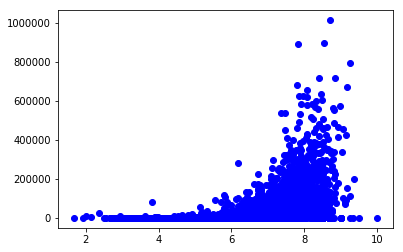

In [18]:
# visualizing the dataset on a scatterplot
plt.scatter(modified_dataset[['rating']], modified_dataset[['members']], color='blue')
# The scatterplot shows that generally speaking high rating animes will have a higher probability to attract more people to watch it
plt.show()

Generally speaking, it is more probable that a movie will be popular if it has higher rating. However, looking at the outliers really infuriates me as some `anime` are rated `10` even though it is not popular. In fact, most popular shows are around the 8-9 ratings. However, those that are rated as 8-9 are not neccessarily good `anime` as evident by the massive amounts of datapoints concentrated at the 8-9 rating region!

## Step 2: Data Preprocessing

Our goal is to find out if an anime is popular or not depending on its `genre`, `type` and `ratings`. Hence, we will create a new column to categorize `members` and one for `cumulative ratings`. We first need to observe the dataset:

Hence, I shall repeat step 2-7 again for my classification process

In [19]:
# Seeing an executive summary of the dataset
modified_dataset.describe()

,anime_id,rating,members
count,11830.000000,11830.000000,1.183000e+04
mean,13404.150211,6.484609,1.851100e+04
std,11110.087616,1.019147,5.537144e+04
min,1.000000,1.670000,1.200000e+01
25%,3326.250000,5.892500,2.322500e+02
50%,9820.500000,6.570000,1.589500e+03
75%,23302.500000,7.190000,9.832000e+03
max,34519.000000,10.000000,1.013917e+06


According to the info above, 50% of the `anime` are captured between `233` amount of raters and `9832` amount of raters, we will classify popularity as per follows:

| Member count range | Category |
| :------------------| -------: |
| less than 233      | not popular|
| 233 - 1,589        | somewhat popular|
| 1,589 - 9,832      | trending|
| 9,832 - inf        | popular|

In [20]:
# Converting member count to 
import numpy as np
bins = [0, 233, 1589, 9832, np.inf]
names = ['not popular', 'somewhat popular', 'trending', 'popular']
modified_dataset['Popularity_a'] = pd.cut(modified_dataset['members'], bins, labels = names) 

print(modified_dataset['Popularity_a'])

0                 popular
1                 popular
2                 popular
3                 popular
4                 popular
5                 popular
6                 popular
7                 popular
8                 popular
9                 popular
10                popular
11                popular
12                popular
13                popular
14                popular
15                popular
16                popular
17                popular
18                popular
19                popular
20                popular
21                popular
22                popular
23                popular
24                popular
25                popular
26                popular
27                popular
28                popular
29                popular
               ...       
12255         not popular
12256         not popular
12258         not popular
12260    somewhat popular
12262         not popular
12263         not popular
12264    somewhat popular
12266    som

Here we visualize the amounts of each category in the column

In [21]:
count = modified_dataset.groupby(['Popularity_a']).size()
print(count)

Popularity_a
not popular         2961
somewhat popular    2954
trending            2957
popular             2958
dtype: int64


Similar to above and continue using the variables, we join the `rating` variable to the `inp`, then split into train and test data:


However, the `members` class is difficult to be used as a an indicator of popularity

Hence, we check the information of the `Cummulative Rating`, which is a multiplication of `members` and `rating`, in order to make a more "accurate" representation of popularity.

In [22]:
# Multiplying 'rating' column with 'members' column
modified_dataset[['Cummulative Rating']] = np.multiply(modified_dataset[['rating']], modified_dataset[['members']])

And we will also use this `Cummulative Rating` as an output to see training on which give better accuracy.

We also need to define what value in `Cummulative Rating` is it considered a good anime. 

In [23]:
# See details of the dataset
modified_dataset[['Cummulative Rating']].describe()

,Cummulative Rating
count,1.183000e+04
mean,1.421010e+05
std,4.499464e+05
min,3.600000e+01
25%,1.375043e+03
50%,1.006245e+04
75%,6.948894e+04
max,8.831217e+06


We will again use the median to construct our new column:

| Member count range | Ratings   | Cummulative Rating | Category |
| :------------------|:-------:  |:------------------:| -------: |
| less than 250      | 0-6.0     | 0-1,375            | not popular|
| 250 - 2,000        | 6.5-7.0   | 1,375 - 10,062     | somewhat popular|
| 2,000 - 10,000     | 7.0-8.0   | 10,062 - 69,489    | trending|,
| 10,000 - 100,000   | 8.0-8.5   | 69,489 - 8,831,217 | popular|

Hence we also do the following:

In [24]:
# Converting 'Cummulative Rating' count to categories
# taking the upper bound
bins = [0, 1375, 10062, 69489, np.inf]
names = ['not popular', 'somewhat popular', 'trending', 'popular']
modified_dataset['Popularity_b'] = pd.cut(modified_dataset['members'], bins, labels = names) 

print(modified_dataset['Popularity_b'])

0            popular
1            popular
2            popular
3            popular
4            popular
5            popular
6            popular
7            popular
8            popular
9            popular
10           popular
11           popular
12           popular
13           popular
14           popular
15           popular
16           popular
17           popular
18           popular
19           popular
20           popular
21           popular
22           popular
23           popular
24           popular
25           popular
26           popular
27           popular
28           popular
29           popular
            ...     
12255    not popular
12256    not popular
12258    not popular
12260    not popular
12262    not popular
12263    not popular
12264    not popular
12266    not popular
12267    not popular
12268    not popular
12269    not popular
12270    not popular
12271    not popular
12272    not popular
12273    not popular
12275    not popular
12276    not 

Again, we view to ensure the amounts of `popular`, `trending`, `somewhat popular` and `not popular` are not the same

In [25]:
count = modified_dataset.groupby(['Popularity_b']).size()
print(count)

Popularity_b
not popular         5659
somewhat popular    3240
trending            2090
popular              841
dtype: int64


In fact, we see a larger disparity between what is considered popular and what isn't.

Next, we split the datasets into test and train dataset. We will do a prediction on two different Popularity metrics, `Popularity_a` and `Popularity_b`.

In [26]:
# spliting data into test and training set
inp_train, inp_test, label_train, label_test = train_test_split(inp, 
            modified_dataset[['Popularity_a']], test_size = 0.1, random_state = 1509)

In [27]:
# spliting data into test and training set
inp_train2, inp_test2, label_train2, label_test2 = train_test_split(inp, 
            modified_dataset[['Popularity_b']], test_size = 0.1, random_state = 1509)

## Step 3: Model Selection

From here, we have a few algorithms to choose from. We can use one of the three:
1. `Random Forest`
2. `Logistic Regression` <--chose this
3. `KNN`

## Step 4: Training

Now, we will train our logistic regression model for first set of data:

In [28]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear',multi_class='auto').fit(inp_train,label_train.values.ravel())
print(logistic_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


Then for the second:

In [29]:
from sklearn.linear_model import LogisticRegression

logistic_model2 = LogisticRegression(solver='liblinear',multi_class='auto').fit(inp_train2,label_train2.values.ravel())
print(logistic_model2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


## Step 5: Evaluation

Here, I have decided to employ the superior version of `kfold`, the `stratified kfold`.

Basically it shuffles the dataset evenly. >:D 

First, let's see the evalaution of `Logarithmic Loss` on the model based on training data

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection

# Trying stratified kfold
stratifiedkfold = StratifiedKFold(n_splits = 10, random_state = None)
# Splitting the dataset into n splits
stratifiedkfold.get_n_splits(X = inp_train)
print(stratifiedkfold)
# obtaining the cross validation result
result = model_selection.cross_val_score(logistic_model, inp_train, label_train.values.ravel(), cv=stratifiedkfold, scoring='neg_log_loss')
print("Logistic Model 1 (train data):", result.mean())

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Logistic Model 1 (train data): -1.0762135858224602


The `Logarithmic Loss` is `-1.076216`.

Now, let's do it based on the test data

In [31]:
# Stratified kfold on Test Data
stratifiedkfold = StratifiedKFold(n_splits = 10, random_state = None)
# Splitting the dataset into n splits
stratifiedkfold.get_n_splits(X = inp_test)
print(stratifiedkfold)
# obtaining the cross validation result
result = model_selection.cross_val_score(logistic_model, inp_test, label_test.values.ravel(),
                                         cv=stratifiedkfold, scoring='neg_log_loss')
print("Logistic Model 1 (test data):", result.mean())

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Logistic Model 1 (test data): -1.1069567344918734


The `Logarithmic Loss` is `-1.106957`.

In [32]:
stratifiedkfold = StratifiedKFold(n_splits = 10, random_state = None)
# Splitting the dataset into n splits
stratifiedkfold.get_n_splits(X = inp_train2)
print(stratifiedkfold)
# obtaining the cross validation result
result = model_selection.cross_val_score(logistic_model2, inp_train2, label_train2.values.ravel(), cv=stratifiedkfold, scoring='neg_log_loss')
print("Logistic Model 2 (train data):", result.mean())

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Logistic Model 2 (train data): -0.9193801428168383


Now evaluating based on test data

In [33]:
stratifiedkfold = StratifiedKFold(n_splits = 10, random_state = None)
# Splitting the dataset into n splits
stratifiedkfold.get_n_splits(X = inp_train2)
print(stratifiedkfold)
# obtaining the cross validation result
result = model_selection.cross_val_score(logistic_model2, inp_test2, label_test2.values.ravel(), cv=stratifiedkfold, scoring='neg_log_loss')
print("Logistic Model 2 (test data):",result.mean())

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Logistic Model 2 (test data): -0.9723850853314977


The second model actually looks better, doesn't it?

Let's visualize it on a confusion matrix:

Predicted         not popular  popular  somewhat popular  trending
Actual                                                            
not popular               794      754               310       579
somewhat popular          761      699               259       526
trending                  730      653               263       460
popular                   875      821               302       627


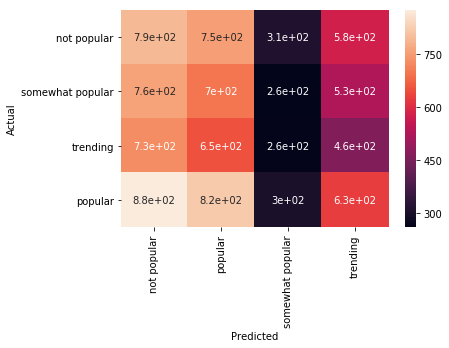

In [34]:
# Model 1
import seaborn as sn
label_pred = logistic_model.predict(inp_train)
label_pred = pd.Series(label_pred, name='Predicted')
label_train = pd.Series(label_train['Popularity_a'], name='Actual', index=label_train.index)
# confusion matrix is created here
model1_confusion = pd.crosstab(label_train, label_pred)
print(model1_confusion)
# plot with seaborn library
sn.heatmap(model1_confusion, annot=True)

Predicted         not popular  popular  somewhat popular  trending
Actual                                                            
not popular              1492     1408               555      1064
somewhat popular          798      708               280       506
trending                  622      558               212       456
popular                   248      253                87       166


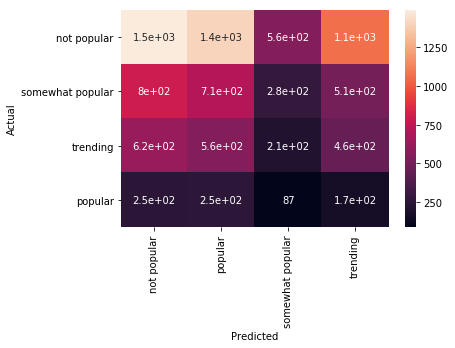

In [35]:
# Model 2
label_pred2 = logistic_model.predict(inp_train2)
label_pred2 = pd.Series(label_pred2, name='Predicted')
label_train2 = pd.Series(label_train2['Popularity_b'], name='Actual', index=label_train2.index)
# confusion matrix is created here
model2_confusion = pd.crosstab(label_train2, label_pred2)
print(model2_confusion)
# Plot heatmap with seaborn library
sn.heatmap(model2_confusion, annot=True)

Now to analyze the evaluations:

### Model 1:

Model 1 has done some very bad generalizing. Everything is basically not popular. 

### Model 2:

Looking row by row, we can observe the following:

- a larger portion of `not popular` datapoints are classified as `not popular`, while coming in close second is classified as `popular`

- a larger portion of `somewhat popular` datapoints are classified as `not popular`, while coming in close second is classified as `popular`

- a larger portion of `trending` datapoints are classified as `not popular`, while coming in close second is classified as `popular`

- a larger portion of `popular` datapoints are classified as `popular`, while coming in close second is classified as `not popular`

from this, we can see that the model can capture some traits of popular anime and not popular anime. but everything in between works more poorly.

We have to remember the criteria of "popularity" is created by yours truly, hence it could be (must be) my oversight when assigning the categories to each row. 

In actual deployment, this is unacceptable. The only course is to go back to step 3 and choose a different model.

However, here we are left with the option to choose one of the two models we have. Since the second model can at least somehow differentiate `popular` and `not-popular` anime, choosing that is the only option.

## Step 6: Hyperparameter Tuning


Due to the scale and magnitude of the project, I have decided to skip this segment. This step remains for the sake of completeness

## Step 7: Prediction

Applying the second model on the test data:

Predicted         not popular  popular  somewhat popular  trending
Actual                                                            
somewhat popular            5       11                 2         3
trending                   16       17                 5        14
popular                    24       19                 2         8


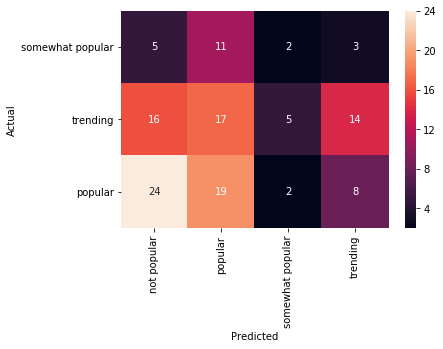

In [36]:
# Model 2
label_pred2 = logistic_model.predict(inp_test2)
label_pred2 = pd.Series(label_pred2, name='Predicted')
label_test2 = pd.Series(label_test2['Popularity_b'], name='Actual', index=label_test2.index)
# confusion matrix is created here
model2_confusion = pd.crosstab(label_test2, label_pred2)
print(model2_confusion)
# Plot heatmap with seaborn library
sn.heatmap(model2_confusion, annot=True)

As you can see form the number of rows in the confusion matrix, one column is left out, probably due to the uneven amounts of each category. But even the result to be honest is not as good as intended, in fact it is very bad. We should try a different algorithm instead. 

# Conclusion

In conclusion, `linear regression` has been applied to predict the rating of an anime based on `genre` and `type` using dummy varaibles method where it will only take `1` or `0` values. The results could only explain a little more than 30% of the variance, hence is not the perfect model to predict the `rating` of an anime. More drastic measures need to be made in order to improve the model. Perhaps looking into what hyperparameters to tune, or even look for a different algorithm altogether.

`Logistic Regression` was way too hard to employ on this dataset. The biggest issue I was facing was actually finding a good way to say which anime is `popular`. I have used the quartiles as a limit to determine what are the values to assign to the popularity of an `anime`. I have use the `kfold` and `confusion matrix` as my evaluation metrics and found the models generated to be too inefficient to be used. Maybe I should use an unsupervised approach to this segment.

All in all, I have learnt a lot of Machine Learning from this assignment. Maybe predicting the market of `otaku`s is not that easy afterall. That being said, I think the model can be used to give a small test on an anime to give a brief overview. In the future, I may find better algorithms and hyperparameters to solve these problems.

# References

Thanks to these links and articles, I am able to deliver this assignment

Multiply columns: https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.multiply.html

scatter plot:https://pythonspot.com/matplotlib-scatterplot/

Create dummy variables:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.get_dummies.html

Finding Significant variables:https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

Creating confusion matrix using pandas: https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python

plotting using `seaborn` library:https://seaborn.pydata.org/generated/seaborn.heatmap.html

Thanks for the open data! https://www.kaggle.com/CooperUnion/anime-recommendations-database/downloads/anime-recommendations-database.zip/1

This is the 7 step that I employ, YufengGuo from Google: https://www.youtube.com/watch?v=nKW8Ndu7Mjw
